step 1 import libraries

In [117]:
from google.colab import drive, files
drive.mount('/content/drive/')
path = "/content/drive/My Drive/"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [118]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

Read the images

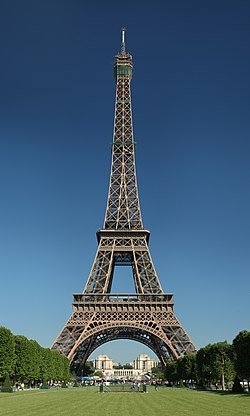

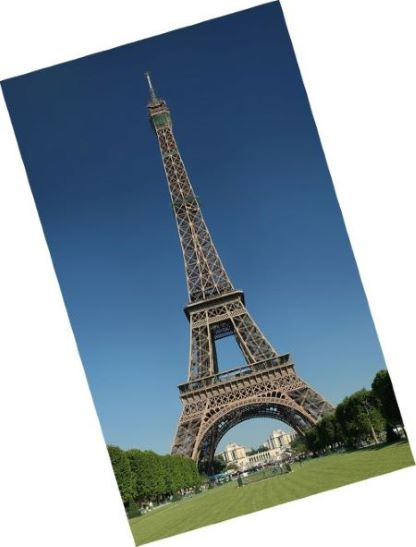

(416, 250, 3)


In [119]:
img1=cv2.imread('drive/MyDrive/img1.jpg')
img2=cv2.imread('drive/MyDrive/img3.jpg')
# Display 'img1'
cv2_imshow(img1)
cv2_imshow(img2)
print(img1.shape)

# New Section

convert images into grayscale

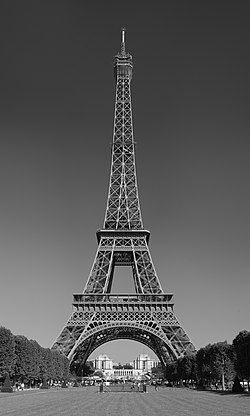

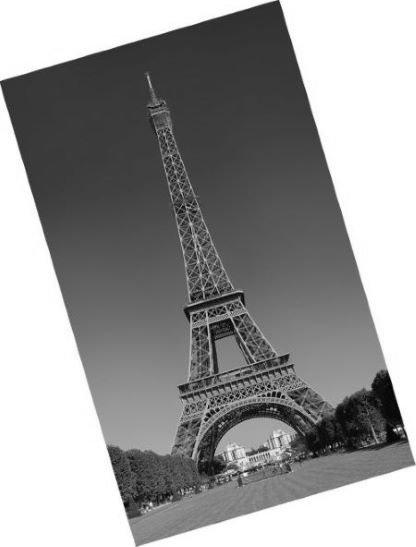

In [120]:
img1=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img2=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
cv2_imshow(img1)
cv2_imshow(img2)

Create SIFT object

In [121]:
sift=cv2.SIFT_create() # this method create sift object
# we create this object to leverage the capabilities of sift for computer vision
# in this code we need keypoints and descriptor


compute keypints and descriptor

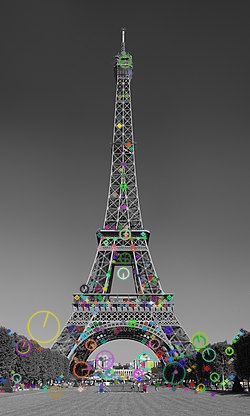

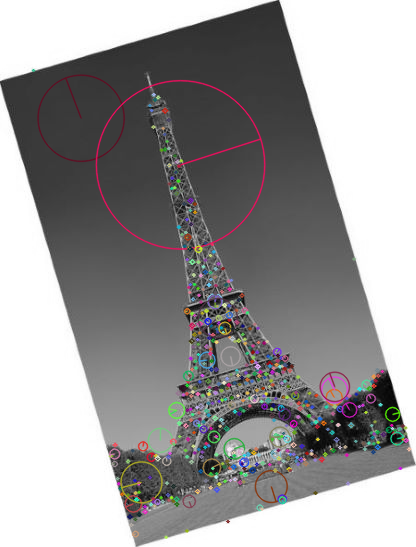

(336, 710)

In [122]:

#find keypoints
keypoint1=sift.detect(img1,None) # keypoints are detectd by identify location whetre the gradient magnitude are high and have a significant change in dirction
keypoint2=sift.detect(img2,None)
#img_1 = cv2.drawKeypoints(img1,keypoint1,None)
#cv2_imshow(img_1)

_,descriptor1=sift.compute(img1,keypoint1,None)
_,descriptor2=sift.compute(img2,keypoint2,None)


#none represent mask in this we take whole image
#keypoint1,descriptor1=sift.detectAndCompute(img1,None)
#keypoint2,descriptor2=sift.detectAndCompute(img2,None)

img_1 = cv2.drawKeypoints(img1,keypoint1,img1,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2_imshow(img_1)
img_2 = cv2.drawKeypoints(img2,keypoint2,img2,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2_imshow(img_2)
len(keypoint1), len(keypoint2)

create fearure matcher Brute fource master

In [123]:
bf=cv2.BFMatcher()#it compare each feature in img1 with every feature in image 2
matches =bf.knnMatch(descriptor1,descriptor2,k=2)


In [124]:
good_matches = []

# Iterate through matches and apply ratio test
for m, n in matches:
    if m.distance < 0.7* n.distance:
        good_matches.append(m)

# Number of SIFT feature matches
num_matches = len(good_matches)
print(num_matches)

157


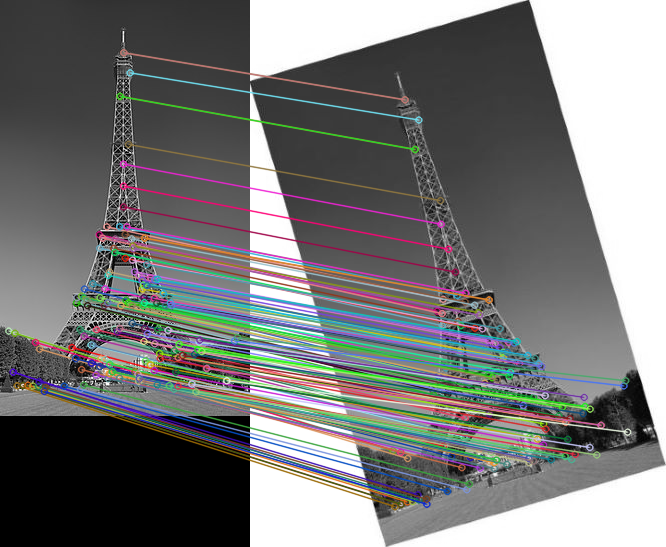

Number of SIFT feature matches: 157


In [125]:

# Draw matches on the images
img_matches = cv2.drawMatches(img1, keypoint1, img2, keypoint2, good_matches, None, flags=2)

# Display the images with matches
cv2_imshow( img_matches)

print(f'Number of SIFT feature matches: {num_matches}')